<a href="https://colab.research.google.com/github/ArovaSyams/machine_learning/blob/main/TensorFlow_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Classification with TensorFlow
we will create a model to classify images of a room and predict whether the room is neat or messy.  
  

Dataset yang kita gunakan memiliki 192 sampel data latih yang terdiri dari 96 sampel gambar ruangan rapi dan 96 sampel gambar ruangan berantakan.

In [29]:
import tensorflow as tf
import zipfile, os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [6]:
# check version
print(tf.__version__)

2.14.0


In [7]:
# preparing dataset
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2023-11-09 08:06:48--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.42, 205.185.216.10
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M   366MB/s    in 0.2s    

2023-11-09 08:06:48 (366 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [10]:
# extract the data that we download
local_zip = "/tmp/messy_vs_clean_room.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp")
zip_ref.close()

In [21]:
# divide dir for train and validation
base_dir = "/tmp/images"
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "val")

In [22]:
# each train and val dir have a clean and dirt sub folder
os.listdir('/tmp/images/train')
os.listdir('/tmp/images/val')

['messy', 'clean']

In [19]:
# use image data generator for preparing train and val data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    fill_mode="nearest"
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [23]:
# prepare training and validation data from the image dataset loaded in memory via the flow() function.
train_generator = train_datagen.flow_from_directory(
    train_dir,  # data train directory
    target_size=(150, 150),  # change all image resolutin to 150x150px
    batch_size=4,
    class_mode="binary" # because its classification for 2 class/label
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode="binary"


Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [24]:
# make model with 4 layer convolution and max pooling
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(512, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [25]:
# to see summary for model that created
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [26]:
# compile model with 'adam' optimizer and loss function 'binary_crossentropy'
model.compile(loss="binary_crossentropy",
              optimizer=tf.optimizers.Adam(),
              metrics=["accuracy"])

In [28]:
# train model with fit
model.fit(
    train_generator,
    steps_per_epoch=25, # how many batch will be executed per epoch
    epochs=20,  # add epoch if accuracy is still not optimal
    validation_data=validation_generator,    # show validation data train accuracy
    validation_steps=5, # some batch will be executed in each epoch
    verbose=2
)

Epoch 1/20
25/25 - 14s - loss: 0.6916 - accuracy: 0.5700 - val_loss: 0.7000 - val_accuracy: 0.5000 - 14s/epoch - 572ms/step
Epoch 2/20
25/25 - 14s - loss: 0.7082 - accuracy: 0.4500 - val_loss: 0.6773 - val_accuracy: 0.5000 - 14s/epoch - 565ms/step
Epoch 3/20
25/25 - 14s - loss: 0.6833 - accuracy: 0.6400 - val_loss: 0.6251 - val_accuracy: 0.7000 - 14s/epoch - 553ms/step
Epoch 4/20
25/25 - 14s - loss: 0.6289 - accuracy: 0.7000 - val_loss: 0.5645 - val_accuracy: 0.7500 - 14s/epoch - 558ms/step
Epoch 5/20
25/25 - 14s - loss: 0.6301 - accuracy: 0.6500 - val_loss: 0.5760 - val_accuracy: 0.7000 - 14s/epoch - 561ms/step
Epoch 6/20
25/25 - 14s - loss: 0.6262 - accuracy: 0.6600 - val_loss: 0.5707 - val_accuracy: 0.7000 - 14s/epoch - 563ms/step
Epoch 7/20
25/25 - 14s - loss: 0.6315 - accuracy: 0.6700 - val_loss: 0.6463 - val_accuracy: 0.5500 - 14s/epoch - 566ms/step
Epoch 8/20
25/25 - 14s - loss: 0.6548 - accuracy: 0.6300 - val_loss: 0.6273 - val_accuracy: 0.8000 - 14s/epoch - 555ms/step
Epoch 9/

Saving IMG_20231109_122412_1.jpg to IMG_20231109_122412_1.jpg
1/1 [==============================] - 0s 45ms/step
IMG_20231109_122412_1.jpg
Messy


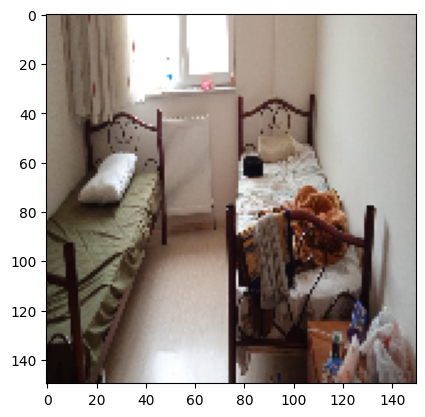

In [33]:
uploaded = files.upload()

for fn in uploaded.keys():

    # predicting image
    path = fn
    img = image.load_img(path, target_size=(150, 150))

    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)
    print(fn)
    if classes == 0:
        print("Clean")
    else:
        print("Messy")